# VOTC RSA Results: Figure 5 Recreation

This notebook loads the processed RSA data (`rsa_correlations.csv`) and generates a figure that replicates the style of Figure 5 from the Saygin et al. paper.

**Purpose:**
1. Load the Fisher-transformed correlation coefficients from your analysis.
2. Separate subjects into 'control' and 'patient' groups.
3. Create a boxplot for the control group's data for each ROI.
4. Overlay individual patient data points for the three longitudinal patients (TC, UD, OT) using distinct markers.
5. Customize aesthetics to match the publication's figure.

## 1. Setup and Imports

First, we'll import the necessary Python libraries for data manipulation (`pandas`) and plotting (`matplotlib`, `seaborn`).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Set plot style for better aesthetics
sns.set_style("ticks")
sns.set_context("talk")

## 2. Load and Prepare Data

Here, we load your `rsa_correlations.csv` file. We will then perform crucial preprocessing steps:

- **Define Subject Groups:** We explicitly list which subjects are controls and which are the longitudinal patients of interest based on the content of your CSV file.
- **Define ROI Order and Colors:** We set a specific order for the ROIs on the x-axis and assign color palettes to match the paper's visual grouping.

In [2]:
# Load the RSA results from your Python script
# --- Use the full, correct path to your data file ---
rsa_df = pd.read_csv('/user_data/csimmon2/long_pt/analyses/rsa_analysis_fixed/rsa_correlations.csv')

# --- CORRECTED: Define subject groups based on YOUR CSV file ---
# These lists now match the subject ID format 'sub-XXX' found in your data.
control_subjects = ['sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 
                    'sub-009', 'sub-010', 'sub-011', 'sub-012']

patient_subjects = ['sub-021']

# Add a 'group' column to the DataFrame
def get_group(subject_id):
    if subject_id in control_subjects:
        return 'Control'
    elif subject_id in patient_subjects:
        return 'Patient'
    else:
        return 'Other'

rsa_df['group'] = rsa_df['subject'].apply(get_group)

# Combine hemisphere and ROI type for plotting labels
rsa_df['roi_label'] = rsa_df['hemisphere'].str.slice(0, 1) + rsa_df['roi_type']

# --- Define the exact order and colors for the plot from the MATLAB script ---
roi_order = ['lIFG', 'lSTG', 'lVWFA', 'lFFA', 'lSTS', 'lpF', 'lLOC', 'lPPA', 'lTOS', 
             'rTOS', 'rPPA', 'rLOC', 'rpF', 'rSTS', 'rFFA']

# Define colors to match the paper's scheme (rrrmmbbgg-ggbbmm)
palette_colors = ['#d62728'] * 3 + ['#9467bd'] * 2 + ['#1f77b4'] * 2 + ['#2ca02c'] * 2 + \
                 ['#2ca02c'] * 2 + ['#1f77b4'] * 2 + ['#9467bd'] * 2 + ['#d62728'] * 2
palette = {roi: color for roi, color in zip(roi_order, palette_colors)}

# Filter data to only include ROIs and groups we want to plot
plot_df = rsa_df[rsa_df['roi_label'].isin(roi_order) & (rsa_df['group'] != 'Other')].copy()

print(f"Data loaded and prepared for plotting.")
print(f"Control data points found: {len(plot_df[plot_df['group'] == 'Control'])}")
print(f"Patient data points found: {len(plot_df[plot_df['group'] == 'Patient'])}")
display(plot_df.head())

Data loaded and prepared for plotting.
Control data points found: 167
Patient data points found: 60


,subject,session,run,session_id,roi,roi_type,hemisphere,x,y,z,preferred_category_matlab,correlation_raw_mean,correlation_fisher_z,n_comparisons,group,roi_label
0,sub-004,ses-01,run-01,sub-004_ses-01_run-01,lFFA,FFA,left,-50.349769,-49.415910,-7.538198,faces,0.036796,0.055988,4,Control,lFFA
1,sub-004,ses-01,run-01,sub-004_ses-01_run-01,lSTS,STS,left,-50.349769,-49.415910,-7.538198,faces,0.036796,0.055988,4,Control,lSTS
2,sub-004,ses-01,run-01,sub-004_ses-01_run-01,lPPA,PPA,left,-33.842509,-58.372304,-19.674645,objects,-0.146191,-0.230361,4,Control,lPPA
3,sub-004,ses-01,run-01,sub-004_ses-01_run-01,lTOS,TOS,left,-35.709181,-62.779906,-18.631293,objects,-0.146191,-0.230361,4,Control,lTOS
4,sub-004,ses-01,run-01,sub-004_ses-01_run-01,rLOC,LOC,right,3.845146,-57.123800,-0.646195,houses,-0.101894,-0.104385,4,Control,rLOC


## 3. Generate the Figure

Now we'll use `seaborn` and `matplotlib` to construct the plot. This involves:
1.  Creating the boxplots for the control group.
2.  Overlaying the patient data as a scatter plot (`stripplot`). We define custom markers for each patient to distinguish them, just like in the paper.
3.  Fine-tuning the plot's appearance (labels, limits, etc.).

/tmp/ipykernel_1772871/2633341675.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1772871/2633341675.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(clean_labels, ha='right')


Figures saved to: /user_data/csimmon2/git_repos/long_pt/results


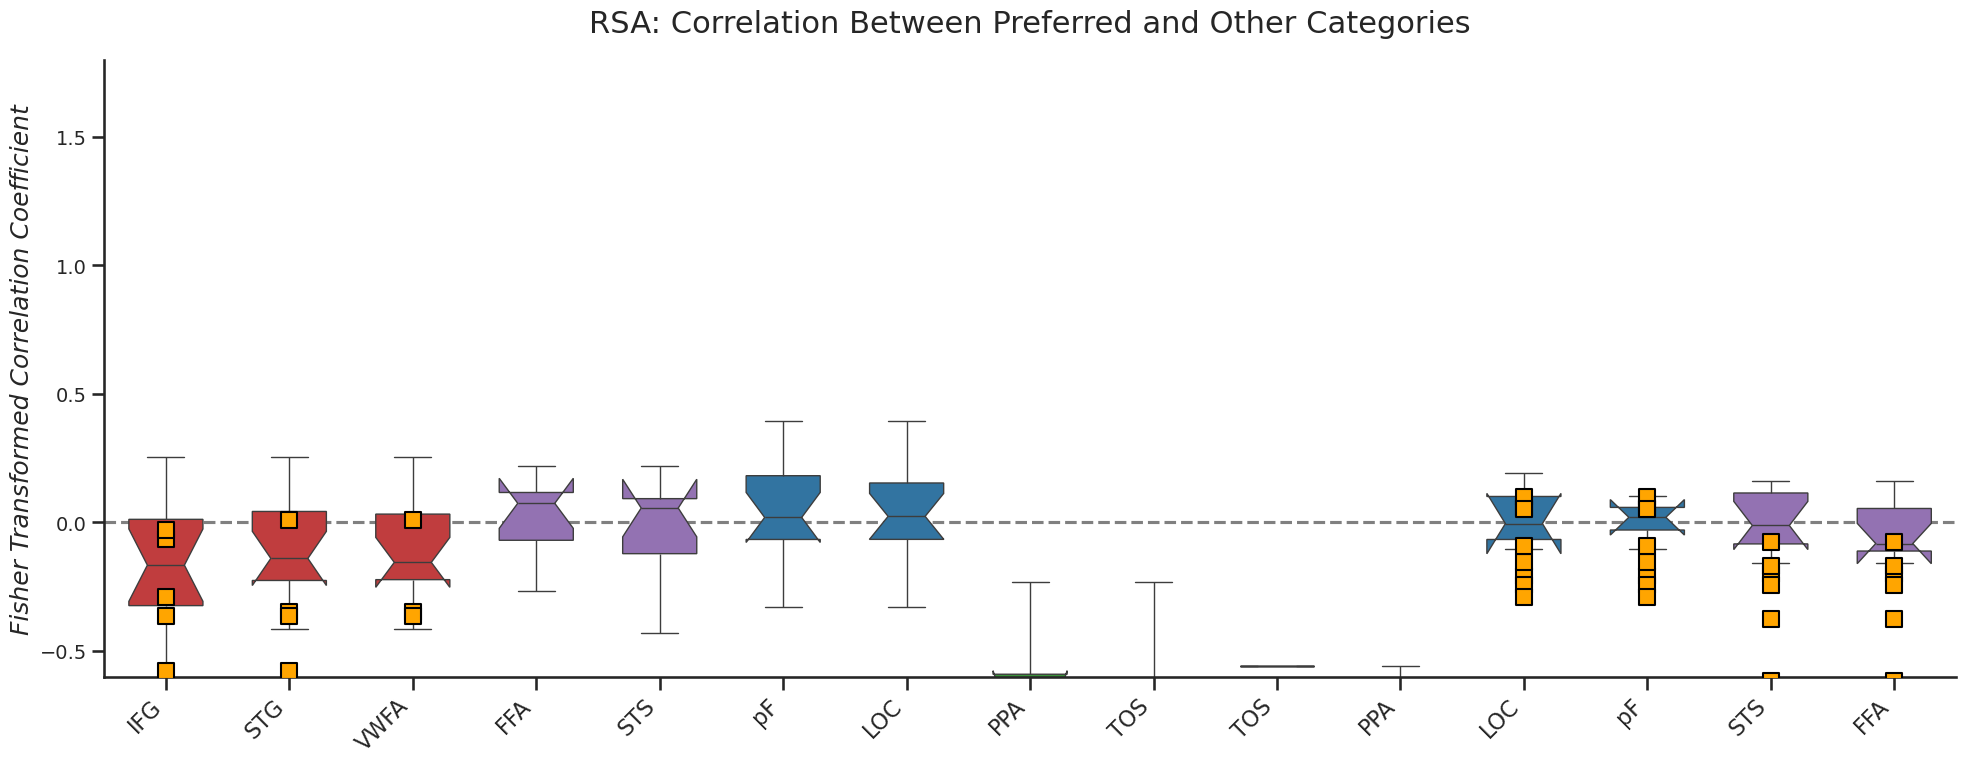

In [3]:
# --- CORRECTED: Map patient IDs to specific markers ---
# This now uses the correct patient ID from your file.
patient_marker_map = {
    'sub-021': 's',   # Patient sub-021 gets a square marker
    # Add other patients here if you have them, e.g.: 'sub-022': 'D'
}

patient_df = plot_df[plot_df['group'] == 'Patient'].copy()

# Avoid errors if there are no patients found
if not patient_df.empty:
    patient_df['marker'] = patient_df['subject'].map(patient_marker_map).fillna('x')

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(20, 8))

# 1. Create the boxplots for the control group
sns.boxplot(
    data=plot_df[plot_df['group'] == 'Control'],
    x='roi_label',
    y='correlation_fisher_z',
    order=roi_order,
    palette=palette,
    width=0.6,
    ax=ax,
    fliersize=0, # Hide default outliers since we are plotting patient data separately
    notch=True   # Replicates the 'notch' argument from the MATLAB script
)

# 2. Overlay the scatter plot for the patient group
# We iterate through each marker type to plot them with the correct style
if not patient_df.empty:
    for marker_style in patient_df['marker'].unique():
        subset = patient_df[patient_df['marker'] == marker_style]
        sns.stripplot(
            data=subset,
            x='roi_label',
            y='correlation_fisher_z',
            order=roi_order,
            ax=ax,
            s=12,  # Corresponds to markerSize in MATLAB
            marker=marker_style,
            linewidth=1.5,
            edgecolor='black',
            facecolor='orange', # Use a single, distinct color for all patients
            jitter=False # Align points directly on the boxplot axis
        )

# 3. Customize the plot aesthetics to match the paper
ax.set_ylabel('Fisher Transformed Correlation Coefficient', fontsize=18, fontstyle='italic')
ax.set_xlabel(None) # The paper does not have an x-axis label
ax.tick_params(axis='x', labelsize=16, labelrotation=45)
ax.tick_params(axis='y', labelsize=14)

# Update x-tick labels to be more readable (e.g., lVWFA -> VWFA)
clean_labels = [label.replace('l','').replace('r','') for label in roi_order]
ax.set_xticklabels(clean_labels, ha='right')

# Set axis limits and line from the MATLAB script
ax.set_ylim(-0.6, 1.8)
ax.axhline(0, ls='--', color='grey', zorder=0) # Add a line at y=0

plt.title('RSA: Correlation Between Preferred and Other Categories', fontsize=22, pad=20)
sns.despine() # Remove top and right spines
plt.tight_layout()

# --- Save the figure to your specified results directory ---
output_dir = '/user_data/csimmon2/git_repos/long_pt/results'
os.makedirs(output_dir, exist_ok=True) # Ensure the directory exists

png_path = os.path.join(output_dir, 'figure5_recreation.png')
eps_path = os.path.join(output_dir, 'figure5_recreation.eps')

plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(eps_path, format='eps', bbox_inches='tight') # For vector graphics

print(f"Figures saved to: {output_dir}")

plt.show()

for figure above "D Fisher-transformed correlation coefficient between the preferred category and all other categories for each ROI in each patient’s last scan session and in TD controls. Each boxplot displays the full distribution of datapoints from the TD control group. A horizontal line inside the box indicates the median, the box represents the interquartile range between the first and the third quartiles, and the whiskers extend to the most extreme datapoints that are not considered outliers by the algorithm (MATLAB function: boxplot). Data points from each identifiable ROI in the patients are depicted with unique shapes per patient: triangle (KN), circle (SN), square (TC), diamond (UD), and star (OT). Details of the ROIs that are resected, not covered, or not found in the patients are shown in Supplementary Fig. S3. "

## 4. Summary & Next Steps

The plot above should now closely resemble the longitudinal Figure 5 from the paper. You can adjust the colors, marker sizes, and labels as needed to get an exact match.

**Possible next steps could include:**
- **Statistical Testing:** Replicating the Crawford's t-tests from the Matlab script to statistically compare each patient to the control group distribution for each ROI.
- **Cross-Sectional Plot:** The MATLAB script also created a second figure for a cross-sectional analysis. We could adapt this notebook to create that plot as well.
- **3D Voxel Plotting:** Translate the second MATLAB script you found to create the 3D anatomical visualizations for patient UD.